In [18]:
%store -r nums_ext
%store -r n_nums_cols
%store -r edu_cols

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fx import hex_to_rgb, plotscat, cus_palette

# set static variables
dir_str = os.getcwd()
file_n = "/admission2.csv"
id_str = 'userID'

edu_col_order = ['HighO', 'High', 'UnivO', 'Univ', 'GradO', 'Grad']

K-means clustering

In [19]:
X = nums_ext.drop(n_nums_cols, axis = 1)

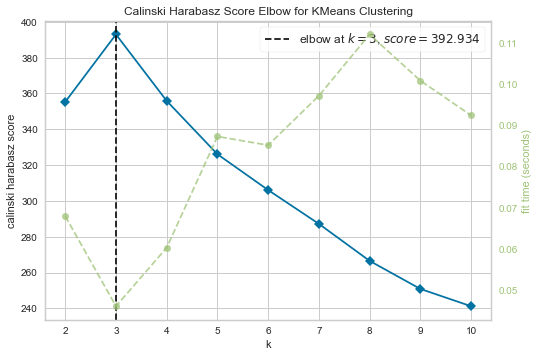

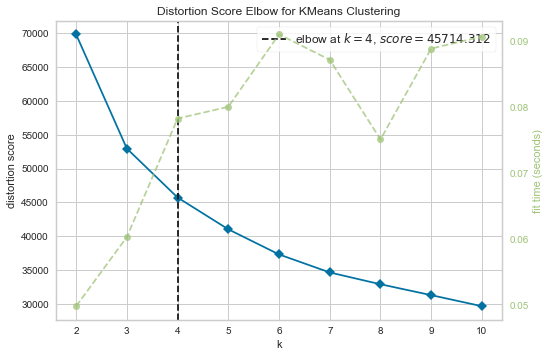

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
cl = KElbowVisualizer(model, k=(2,11), metric='calinski_harabasz')

cl.fit(X)
cl.poof()

cl2 = KElbowVisualizer(model, k=(2,11))

cl2.fit(X)
cl2.poof()

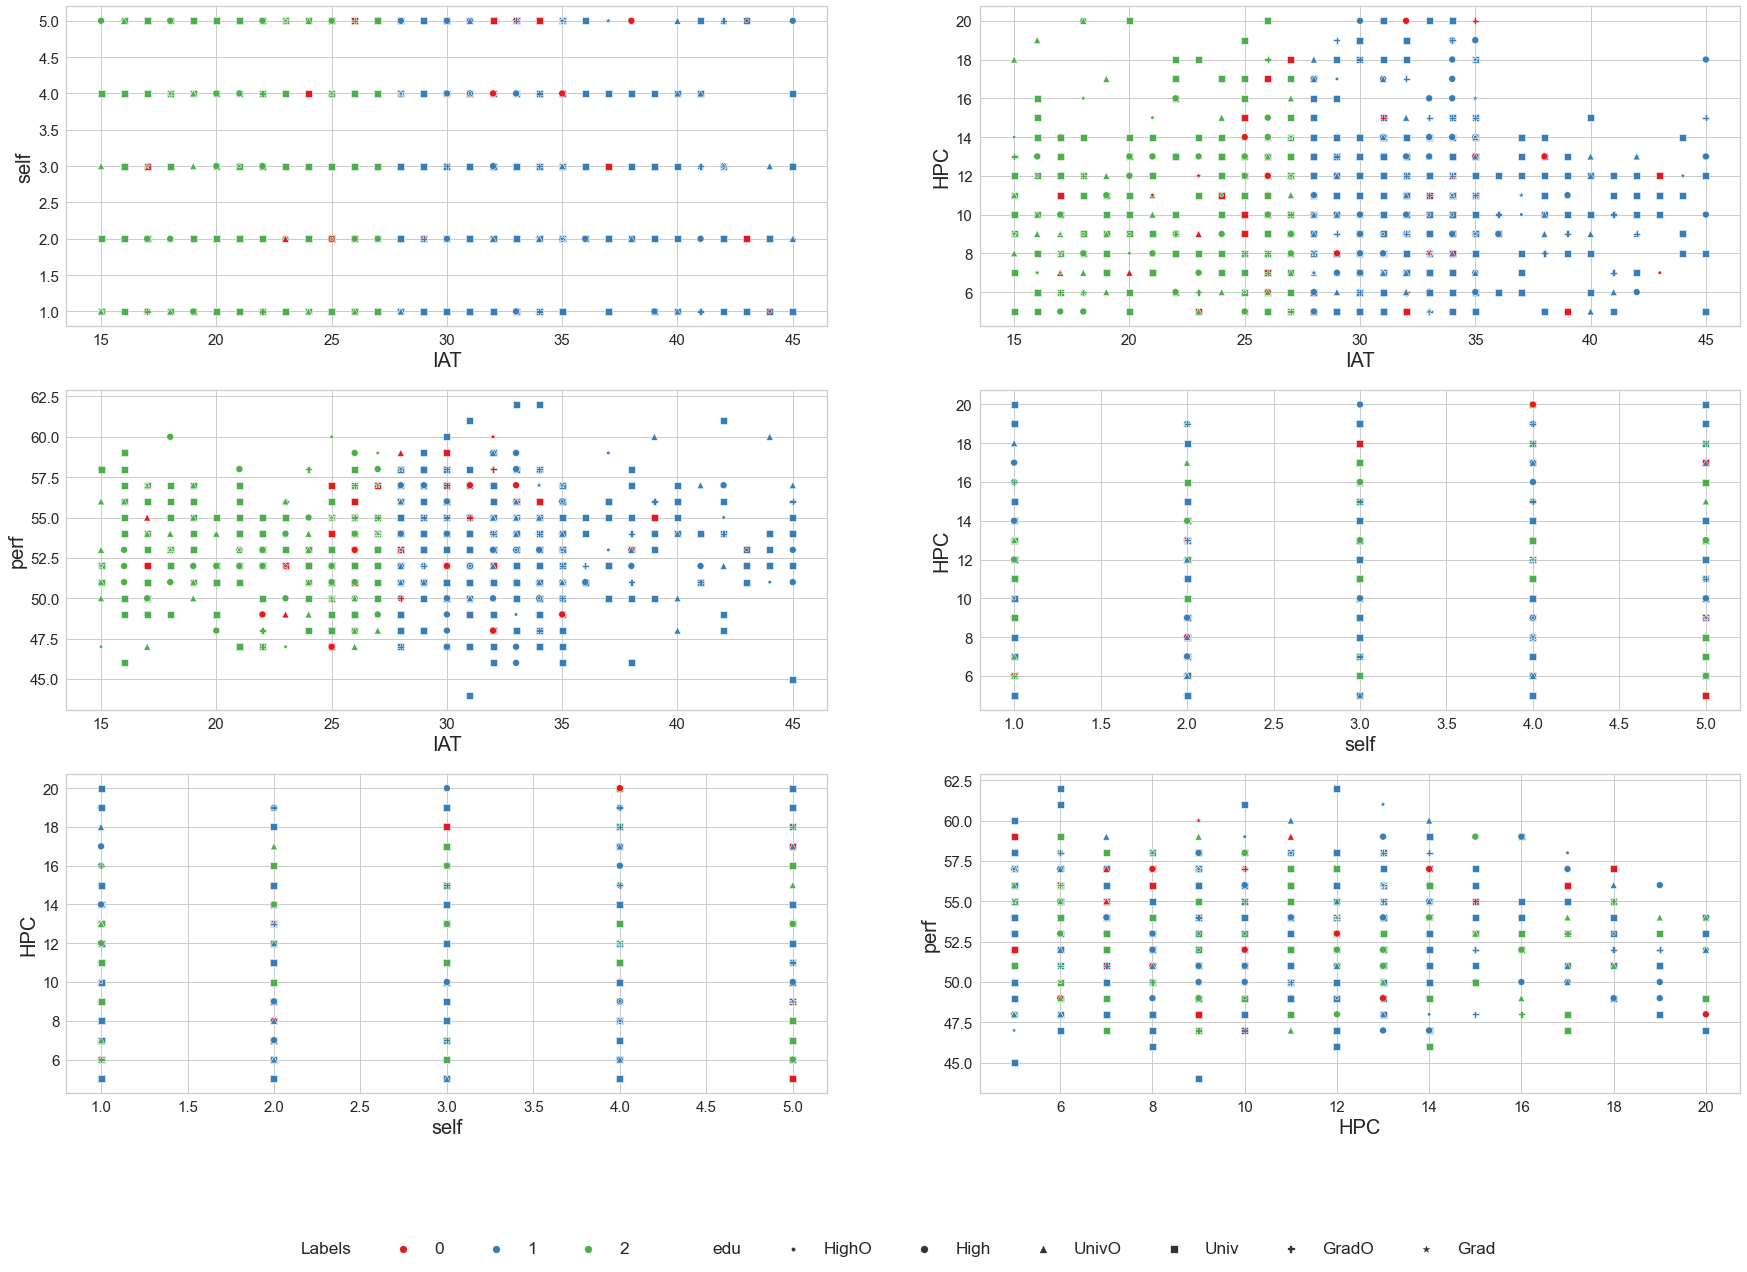

In [21]:
n_cls = 3
km3 = KMeans(n_clusters=n_cls).fit(X)

nums_ext['Labels'] = km3.labels_
plotscat(nums_ext, n_cls, X)

edu     HighO  High  UnivO  Univ  GradO  Grad
Labels                                       
0           4    28     13    40     11     6
1          24    98     79   273     61    35
2          24    52     57   158     23    14


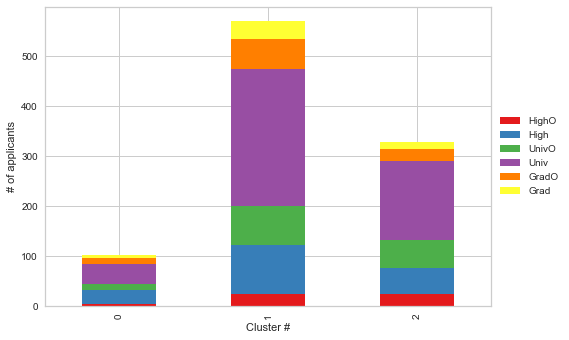

In [22]:
by_cl = nums_ext[['Labels','edu']].groupby(['Labels', 'edu'])['Labels'].count().unstack(fill_value=0)
by_cl = by_cl[edu_col_order]
print(by_cl)

ax = by_cl[by_cl.columns].plot(kind = "bar", color = cus_palette, stacked = True, legend = False)
plt.xlabel("Cluster #")
plt.ylabel("# of applicants")

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot:xlabel='Labels', ylabel='IAT'>

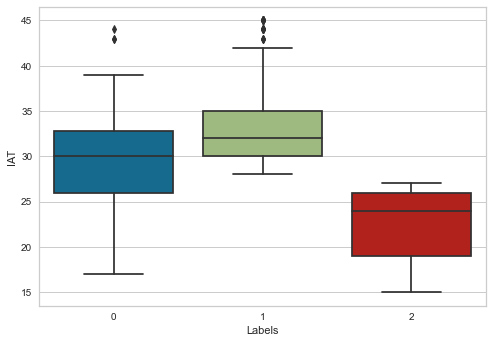

In [23]:
sns.boxplot(x='Labels', y='IAT', data=nums_ext)

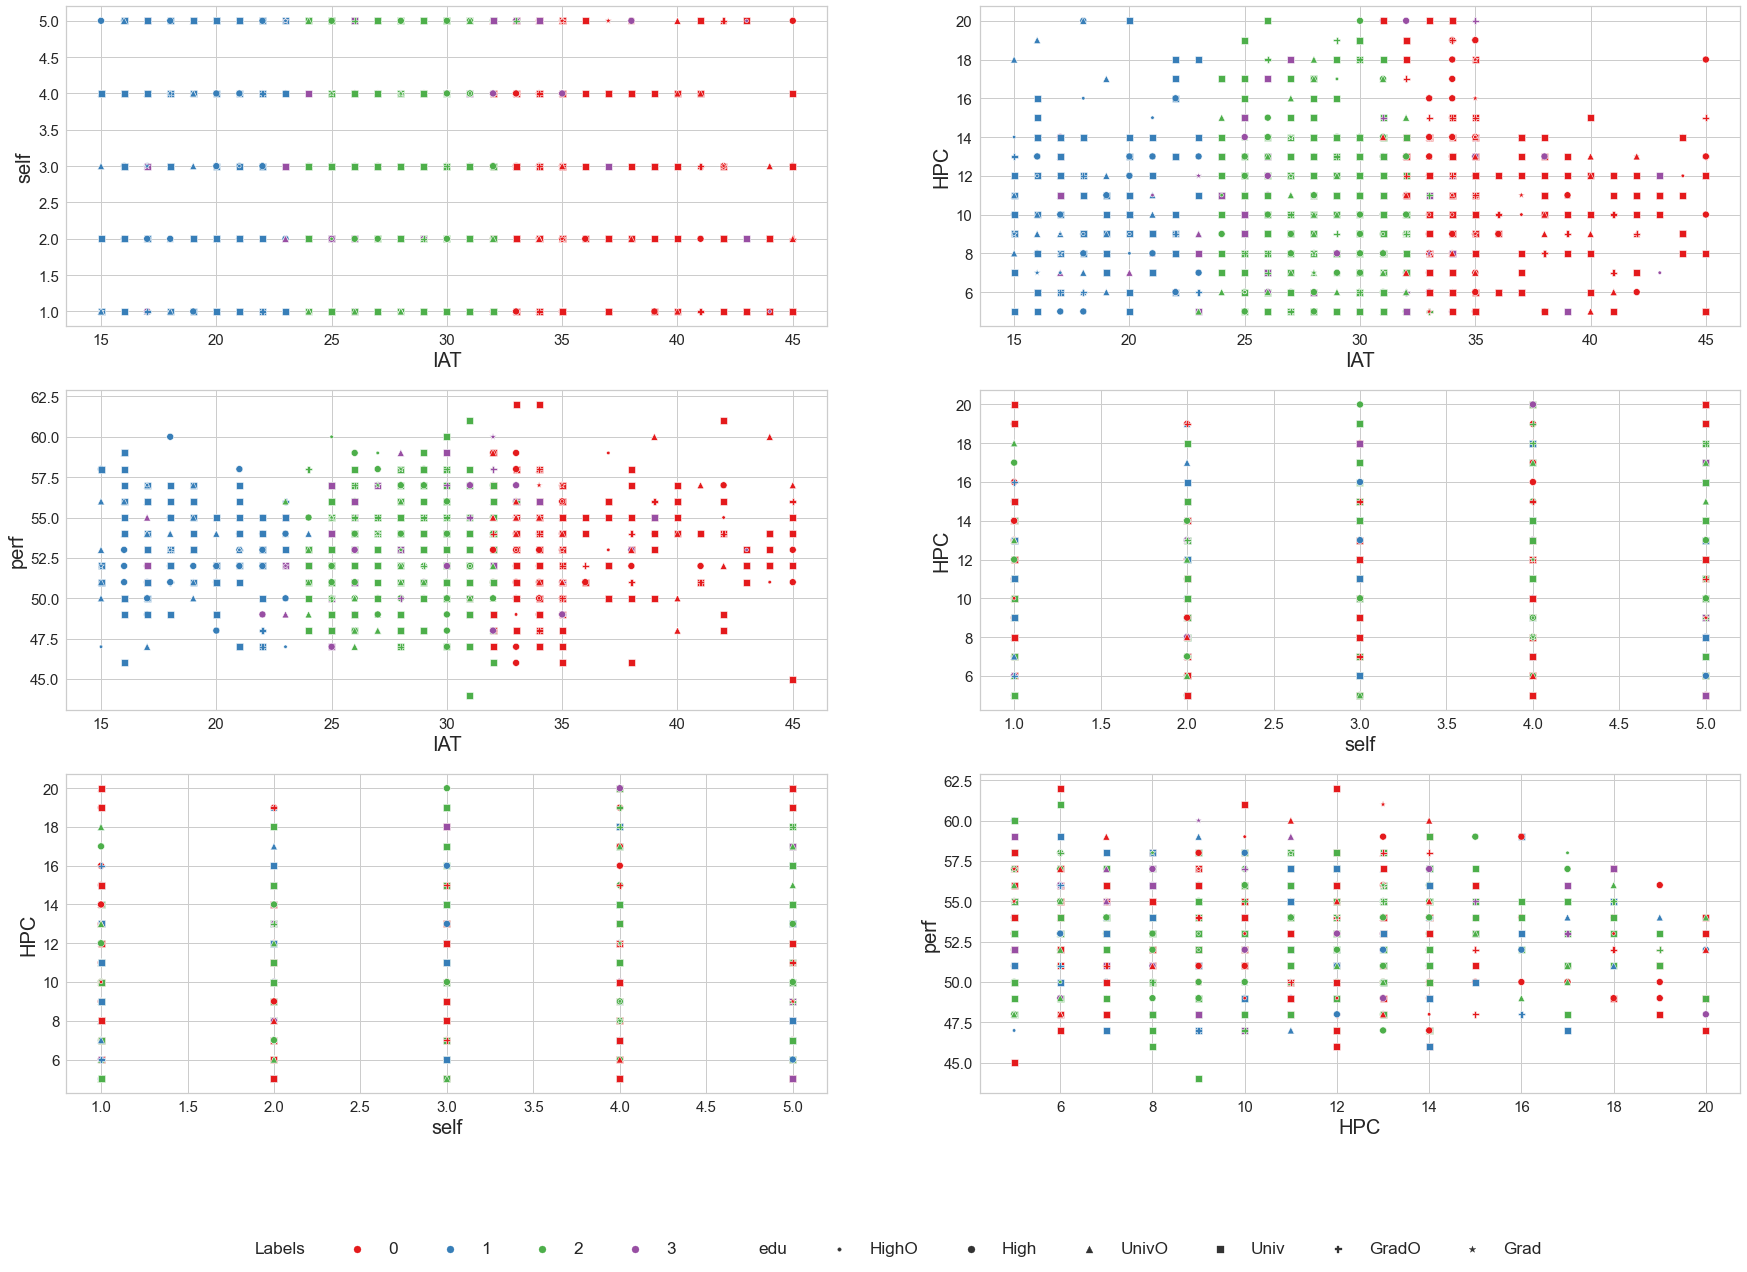

In [24]:
n_cls = 4
km4 = KMeans(n_clusters=n_cls).fit(X)

nums_ext['Labels'] = km4.labels_
plotscat(nums_ext, n_cls, X)

edu     HighO  High  UnivO  Univ  GradO  Grad
Labels                                       
0          15    52     38   134     32    14
1          12    27     27    76     10     5
2          21    71     69   219     41    30
3           4    28     15    42     12     6


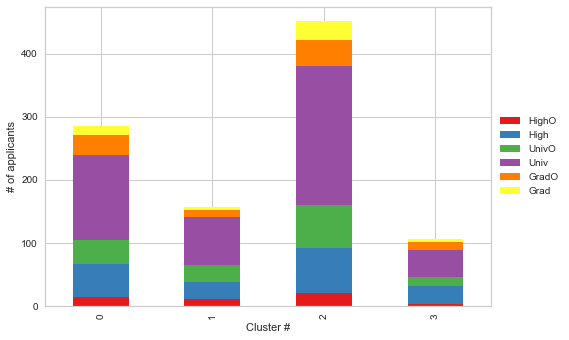

In [25]:
by_cl = nums_ext[['Labels','edu']].groupby(['Labels', 'edu'])['Labels'].count().unstack(fill_value=0)
by_cl = by_cl[edu_col_order]
print(by_cl)

ax = by_cl[by_cl.columns].plot(kind = "bar", color = cus_palette, stacked = True, legend = False)
plt.xlabel("Cluster #")
plt.ylabel("# of applicants")

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot:xlabel='Labels', ylabel='IAT'>

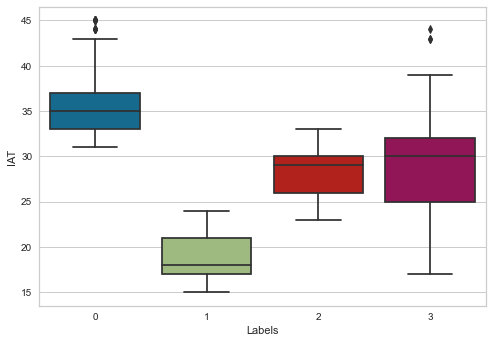

In [26]:
sns.boxplot(x='Labels', y='IAT', data=nums_ext)

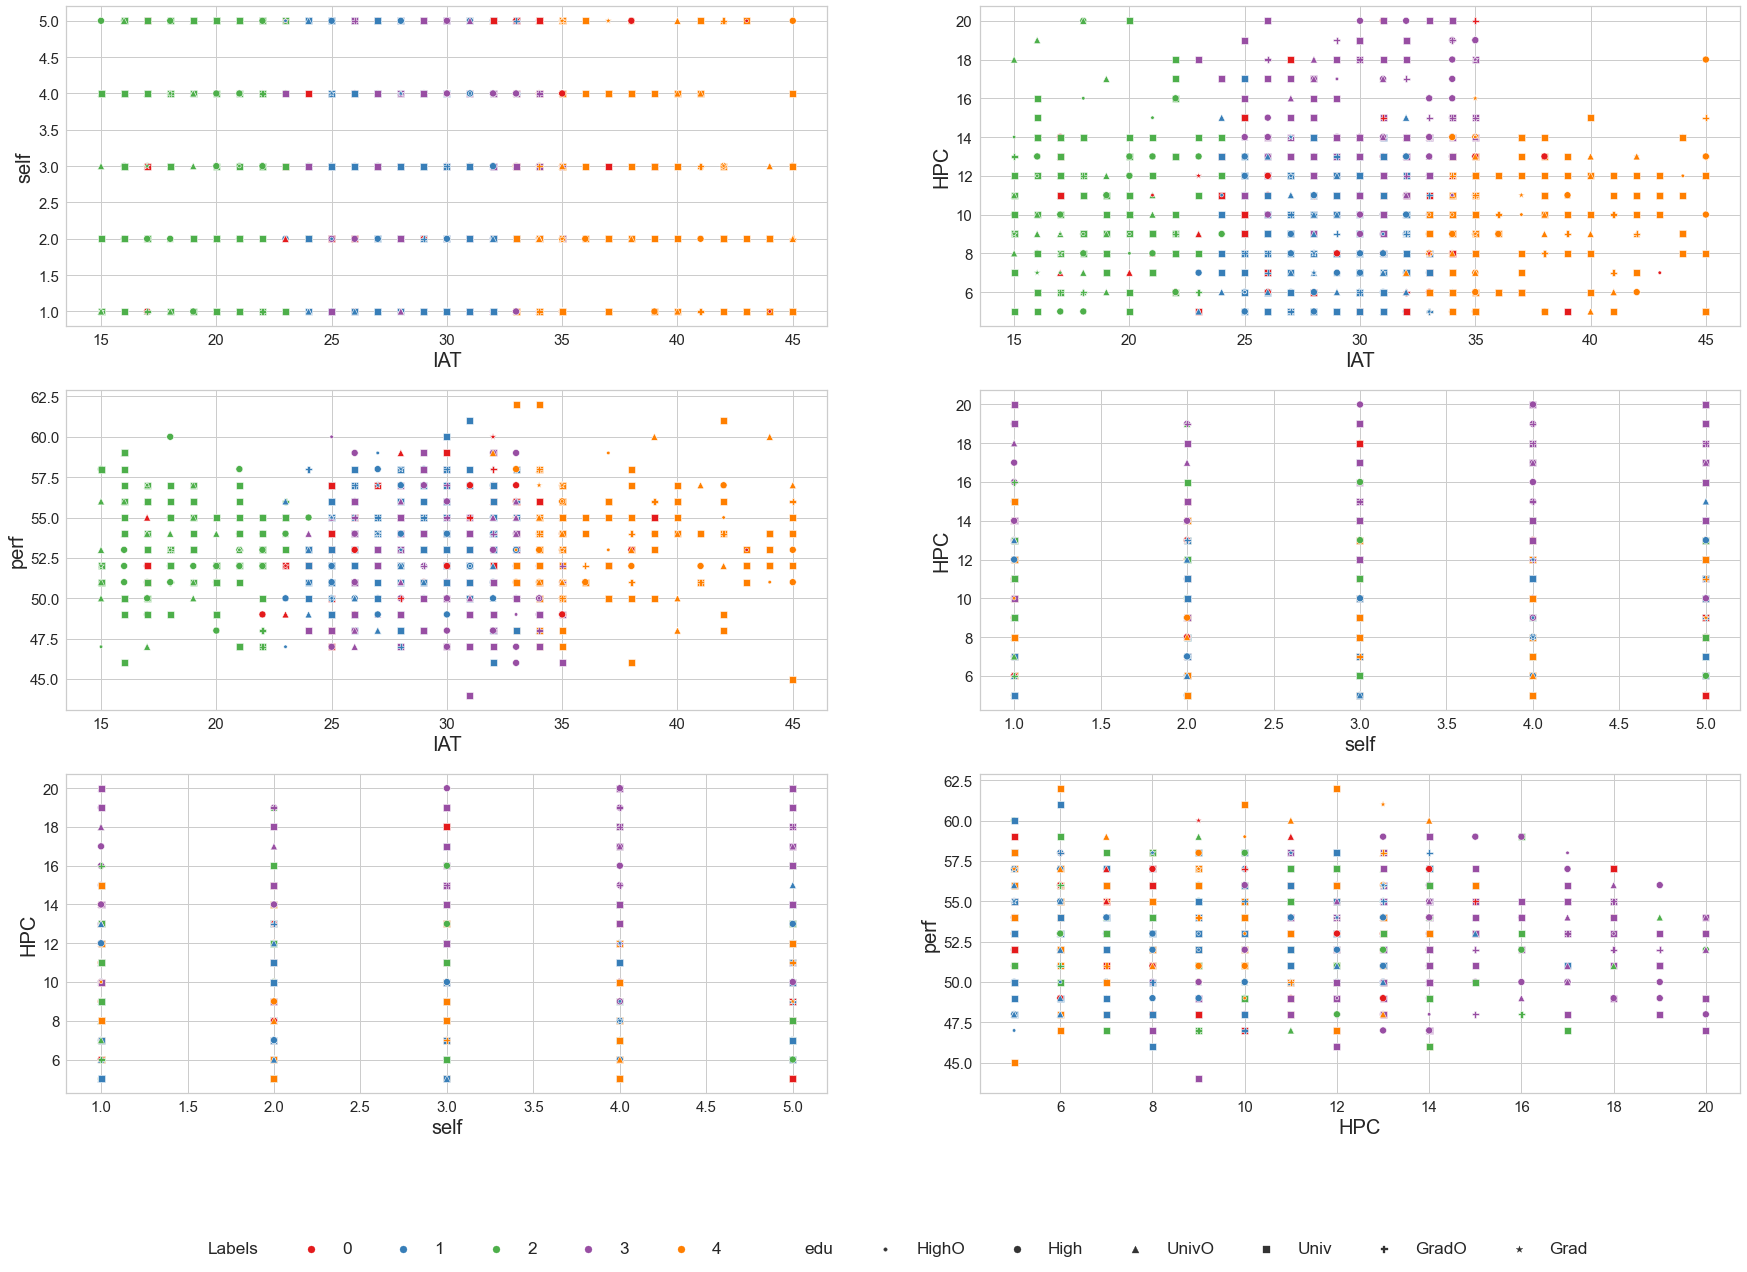

In [27]:
n_cls = 5
km5 = KMeans(n_clusters=n_cls).fit(X)

nums_ext['Labels'] = km5.labels_
plotscat(nums_ext, n_cls, X)

edu     HighO  High  UnivO  Univ  GradO  Grad
Labels                                       
0           3    22     12    28      8     6
1          14    47     59   155     34    28
2          11    27     26    78     10     5
3          13    55     28   109     25     5
4          11    27     24   101     18    11


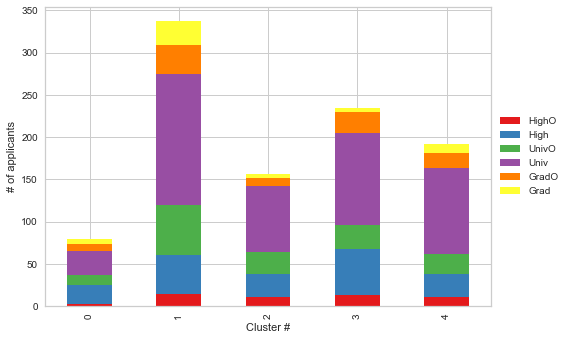

In [28]:
by_cl = nums_ext[['Labels','edu']].groupby(['Labels', 'edu'])['Labels'].count().unstack(fill_value=0)
by_cl = by_cl[edu_col_order]
print(by_cl)

ax = by_cl[by_cl.columns].plot(kind = "bar", color = cus_palette, stacked = True, legend = False)
plt.xlabel("Cluster #")
plt.ylabel("# of applicants")

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot:xlabel='Labels', ylabel='IAT'>

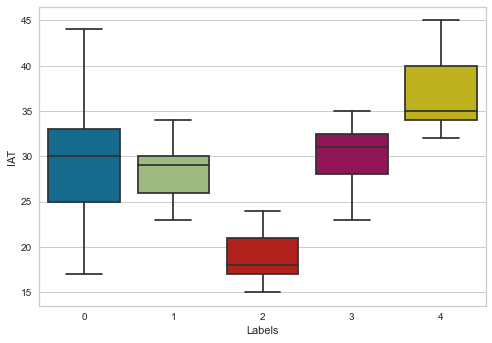

In [29]:
sns.boxplot(x='Labels', y='IAT', data=nums_ext)

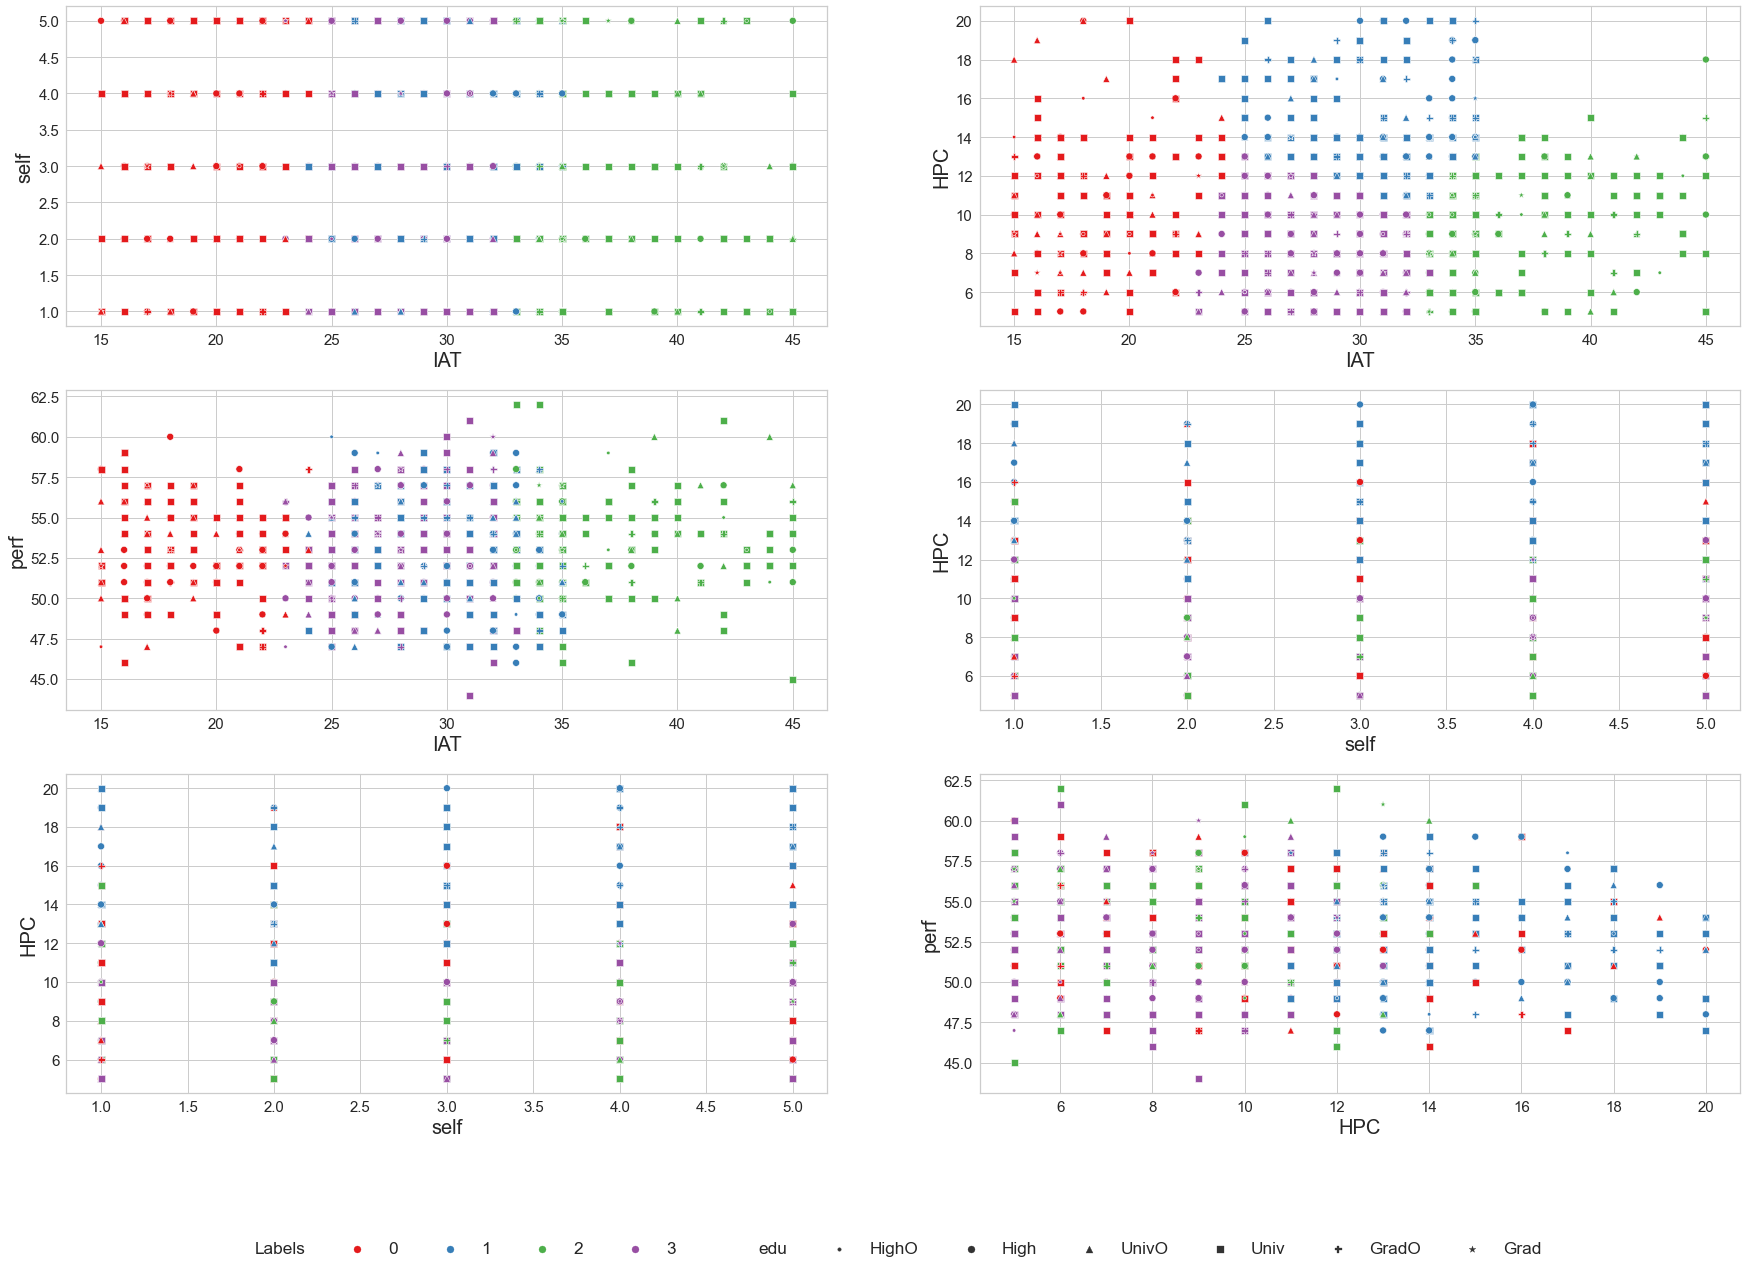

In [30]:
# clustering based on some variables

n_cls = 4
km4 = KMeans(n_clusters=n_cls).fit(X[['IAT', 'self', 'HPC', 'perf'] + edu_cols])

nums_ext['Labels'] = km4.labels_
plotscat(nums_ext, n_cls, X)

edu     HighO  High  UnivO  Univ  GradO  Grad
Labels                                       
0          12    28     33    83     10     6
1          13    53     34   113     30    14
2          13    32     23   108     21    12
3          14    65     59   167     34    23


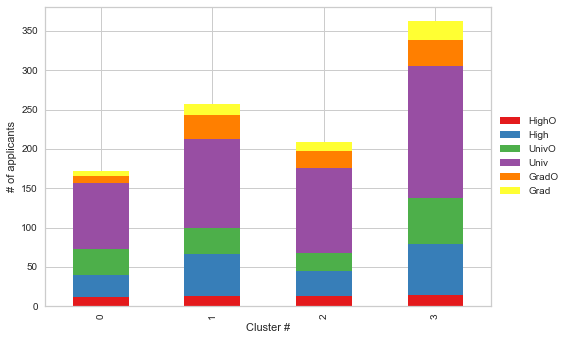

In [31]:
by_cl = nums_ext[['Labels','edu']].groupby(['Labels', 'edu'])['Labels'].count().unstack(fill_value=0)
by_cl = by_cl[edu_col_order]
print(by_cl)

ax = by_cl[by_cl.columns].plot(kind = "bar", color = cus_palette, stacked = True, legend = False)
plt.xlabel("Cluster #")
plt.ylabel("# of applicants")

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot:xlabel='Labels', ylabel='IAT'>

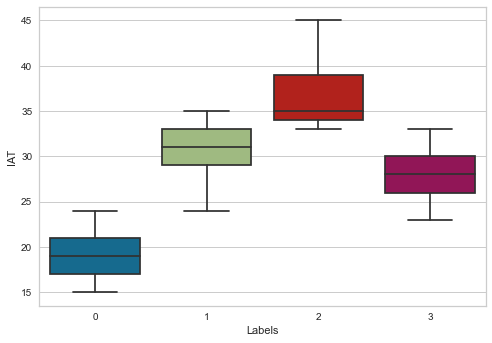

In [32]:
sns.boxplot(x='Labels', y='IAT', data=nums_ext)

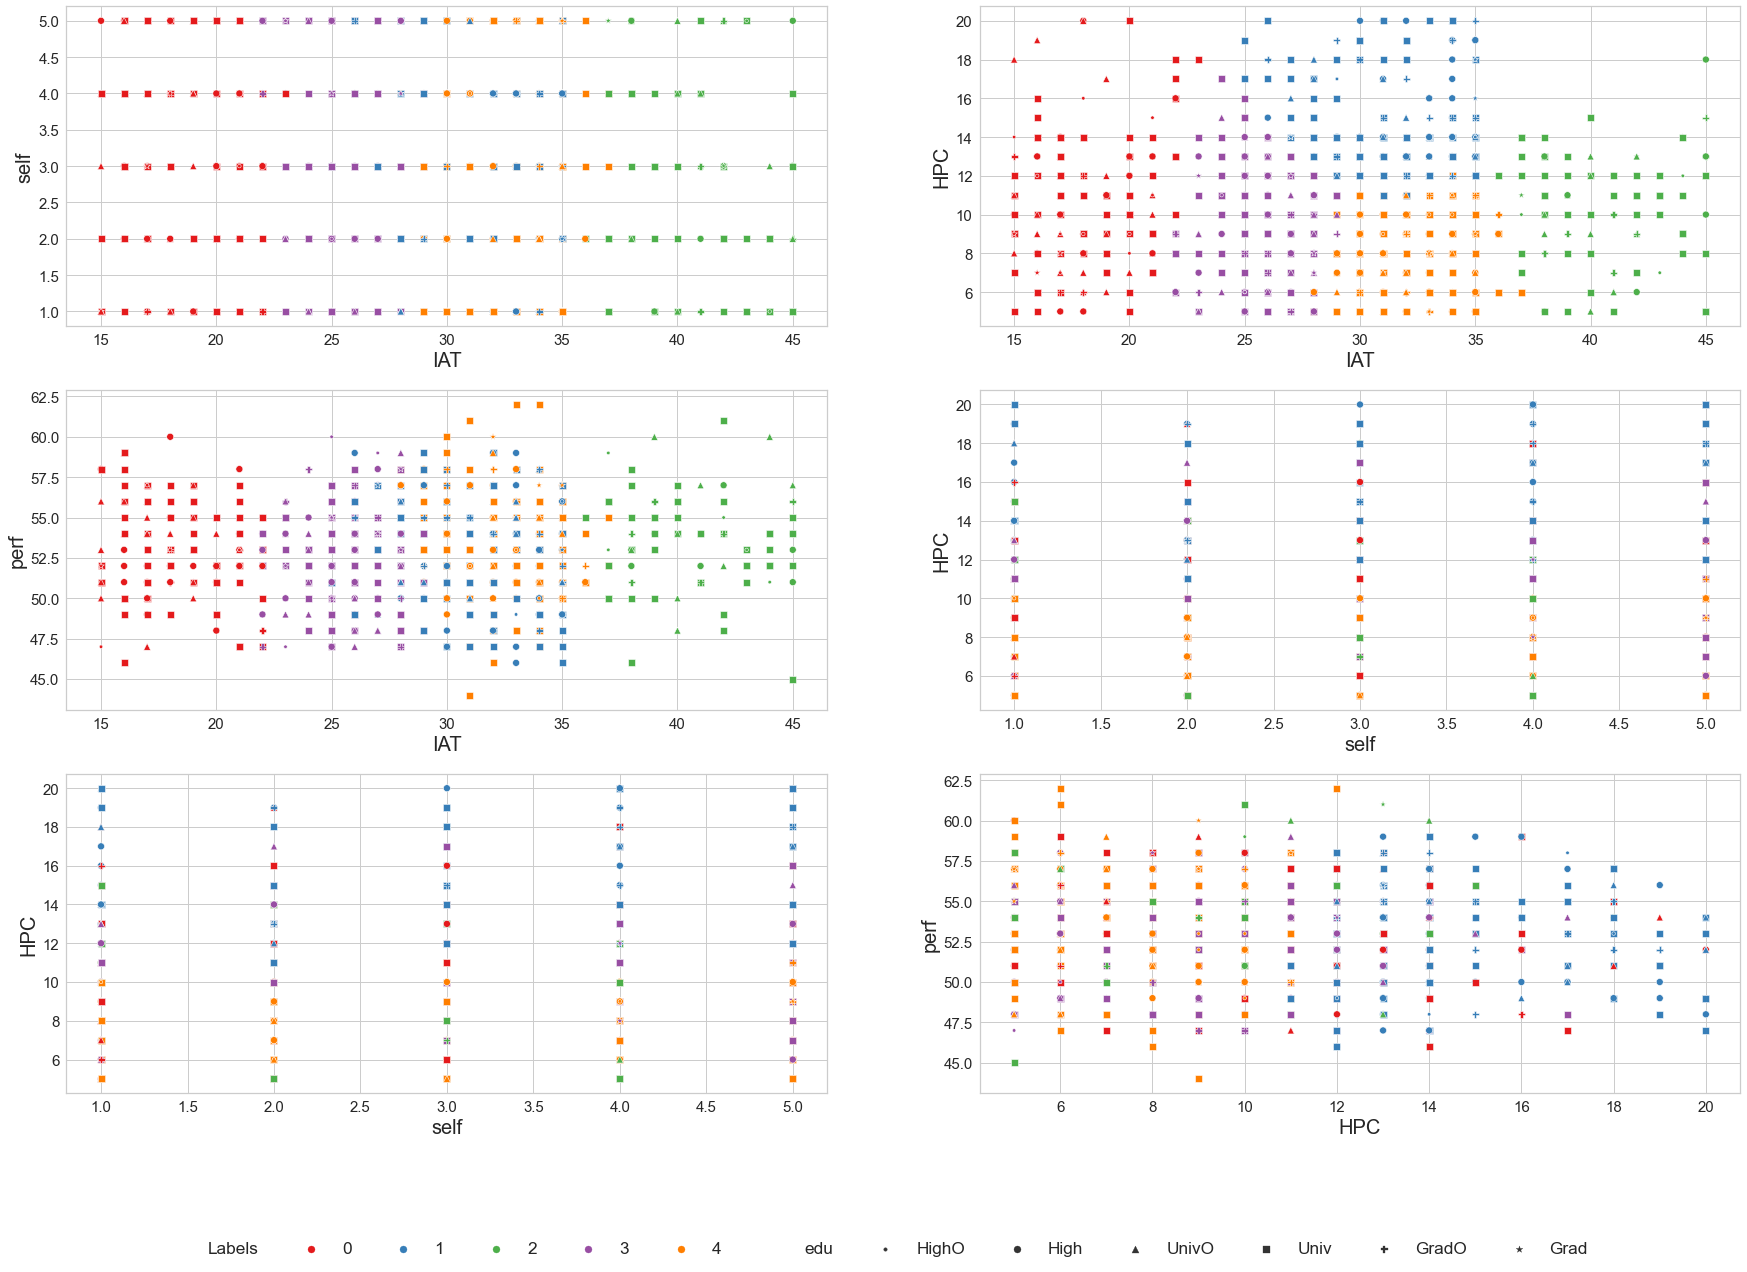

In [33]:
# clustering based on variables except gender

n_cls = 5
km5 = KMeans(n_clusters=n_cls).fit(X[['IAT', 'self', 'HPC', 'perf', 'major_e', 'work_e'] + edu_cols])

nums_ext['Labels'] = km5.labels_
plotscat(nums_ext, n_cls, X)

edu     HighO  High  UnivO  Univ  GradO  Grad
Labels                                       
0          12    24     29    72      7     5
1          10    52     28   105     31    13
2           6     9     13    45      8     2
3          14    40     39   120     18    12
4          10    53     40   129     31    23


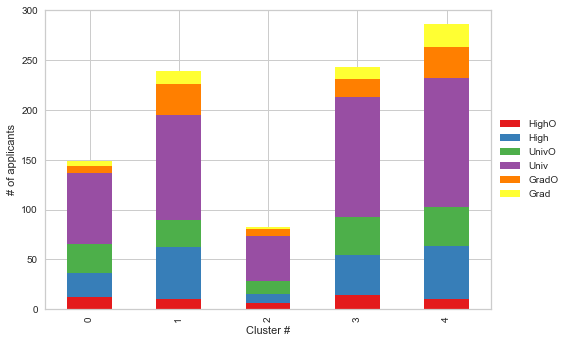

In [34]:
by_cl = nums_ext[['Labels','edu']].groupby(['Labels', 'edu'])['Labels'].count().unstack(fill_value=0)
by_cl = by_cl[edu_col_order]
print(by_cl)

ax = by_cl[by_cl.columns].plot(kind = "bar", color = cus_palette, stacked = True, legend = False)
plt.xlabel("Cluster #")
plt.ylabel("# of applicants")

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot:xlabel='Labels', ylabel='IAT'>

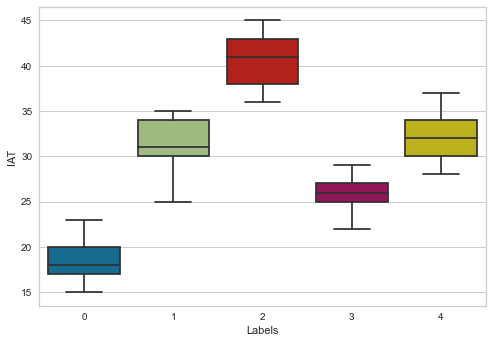

In [35]:
sns.boxplot(x='Labels', y='IAT', data=nums_ext)

In [36]:
# separate other clusters
nums_k5 = nums_ext.copy()
nums_k5["Labels"] = nums_k5["Labels"].replace({0: "0, 1, 2, 3", 1: "0, 1, 2, 3", 2: "0, 1, 2, 3", 3: "0, 1, 2, 3"})
print(nums_k5.describe())

               age          IAT         self          HPC         perf  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     28.484000    29.050000     3.000000    10.532000    53.094000   
std       5.632537     6.303748     1.414921     3.484411     2.819062   
min      20.000000    15.000000     1.000000     5.000000    44.000000   
25%      25.000000    25.000000     2.000000     8.000000    51.000000   
50%      27.000000    30.000000     3.000000    10.000000    53.000000   
75%      31.000000    33.000000     4.000000    13.000000    55.000000   
max      50.000000    45.000000     5.000000    20.000000    62.000000   

            sex_e      major_e       work_e    edu1_Grad   edu1_GradO  \
count  1000.00000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.51000     0.089000     0.705000     0.055000     0.095000   
std       0.50015     0.284886     0.456271     0.228094     0.293362   
min       0.00000     0.000000     0.0000

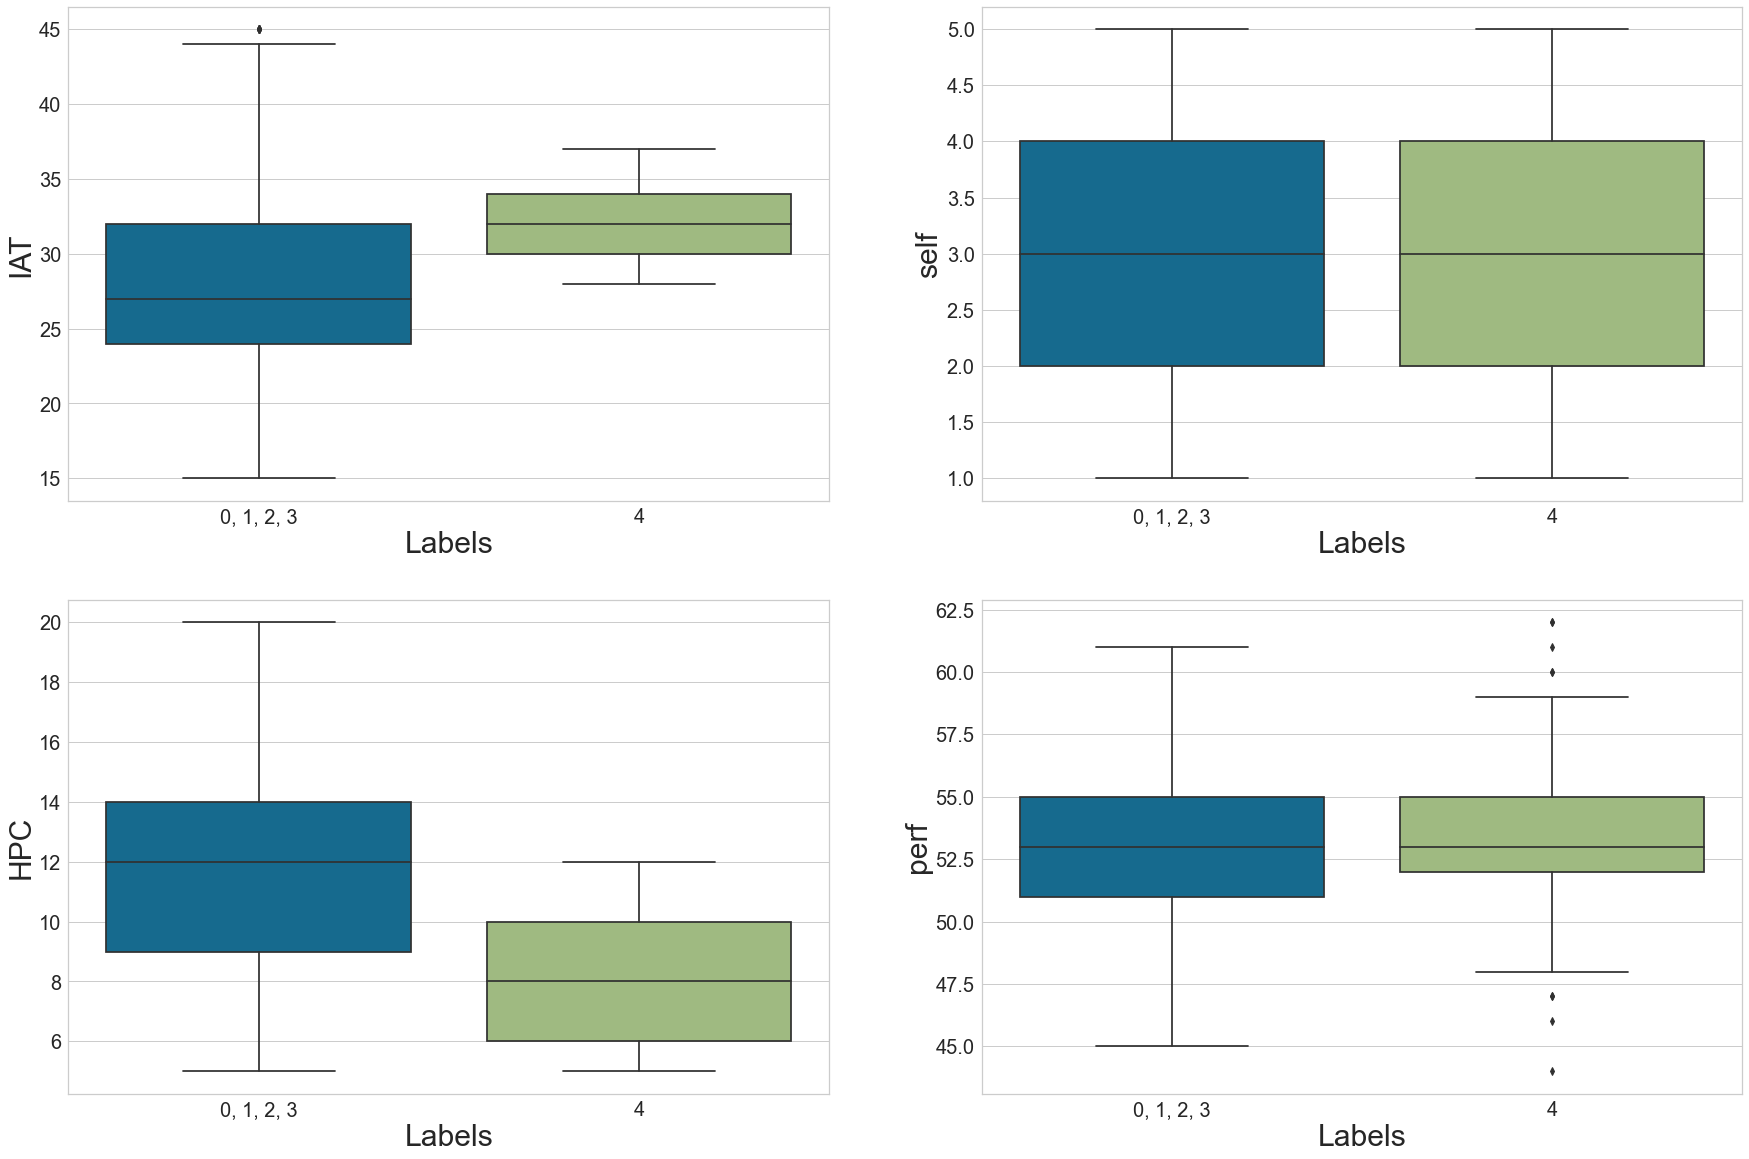

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30,20))
sns.boxplot(x='Labels', y='IAT', data=nums_k5, ax = ax1)
sns.boxplot(x='Labels', y='self', data=nums_k5, ax = ax2)
sns.boxplot(x='Labels', y='HPC', data=nums_k5, ax = ax3)
sns.boxplot(x='Labels', y='perf', data=nums_k5, ax = ax4)
ax1.xaxis.get_label().set_fontsize(30)
ax2.xaxis.get_label().set_fontsize(30)
ax3.xaxis.get_label().set_fontsize(30)
ax4.xaxis.get_label().set_fontsize(30)
ax1.yaxis.get_label().set_fontsize(30)
ax2.yaxis.get_label().set_fontsize(30)
ax3.yaxis.get_label().set_fontsize(30)
ax4.yaxis.get_label().set_fontsize(30)
ax1.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
ax3.tick_params(labelsize=20)
ax4.tick_params(labelsize=20)
plt.show()

Gaussian mixture model

In [38]:
# check if features are gaussian
from scipy.stats import shapiro
for i in X.columns:
    print(f'{i}: {"Not Gaussian" if shapiro(X[i])[1]<0.05 else "Gaussian"}  {shapiro(X[i])}')

age: Not Gaussian  ShapiroResult(statistic=0.8808866739273071, pvalue=5.314387977382806e-27)
IAT: Not Gaussian  ShapiroResult(statistic=0.9763420224189758, pvalue=1.091985182832822e-11)
self: Not Gaussian  ShapiroResult(statistic=0.8878237009048462, pvalue=2.611468559951761e-26)
HPC: Not Gaussian  ShapiroResult(statistic=0.9645125269889832, pvalue=6.948751673347374e-15)
perf: Not Gaussian  ShapiroResult(statistic=0.9881690144538879, pvalue=3.2280195227940567e-07)
sex_e: Not Gaussian  ShapiroResult(statistic=0.6364485621452332, pvalue=1.3577180820843153e-41)
major_e: Not Gaussian  ShapiroResult(statistic=0.31976455450057983, pvalue=0.0)
work_e: Not Gaussian  ShapiroResult(statistic=0.5723682641983032, pvalue=5.465064010866787e-44)
edu1_Grad: Not Gaussian  ShapiroResult(statistic=0.23798465728759766, pvalue=0.0)
edu1_GradO: Not Gaussian  ShapiroResult(statistic=0.33215218782424927, pvalue=0.0)
edu1_High: Not Gaussian  ShapiroResult(statistic=0.46391183137893677, pvalue=0.0)
edu1_HighO: N

None of the features are gaussian - gaussian mixture model is not applicable

Agglomerative Hierarchy

/var/folders/v7/ysbwg68966qbzhd4g05hfkq80000gn/T/ipykernel_10286/285989230.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'ward')


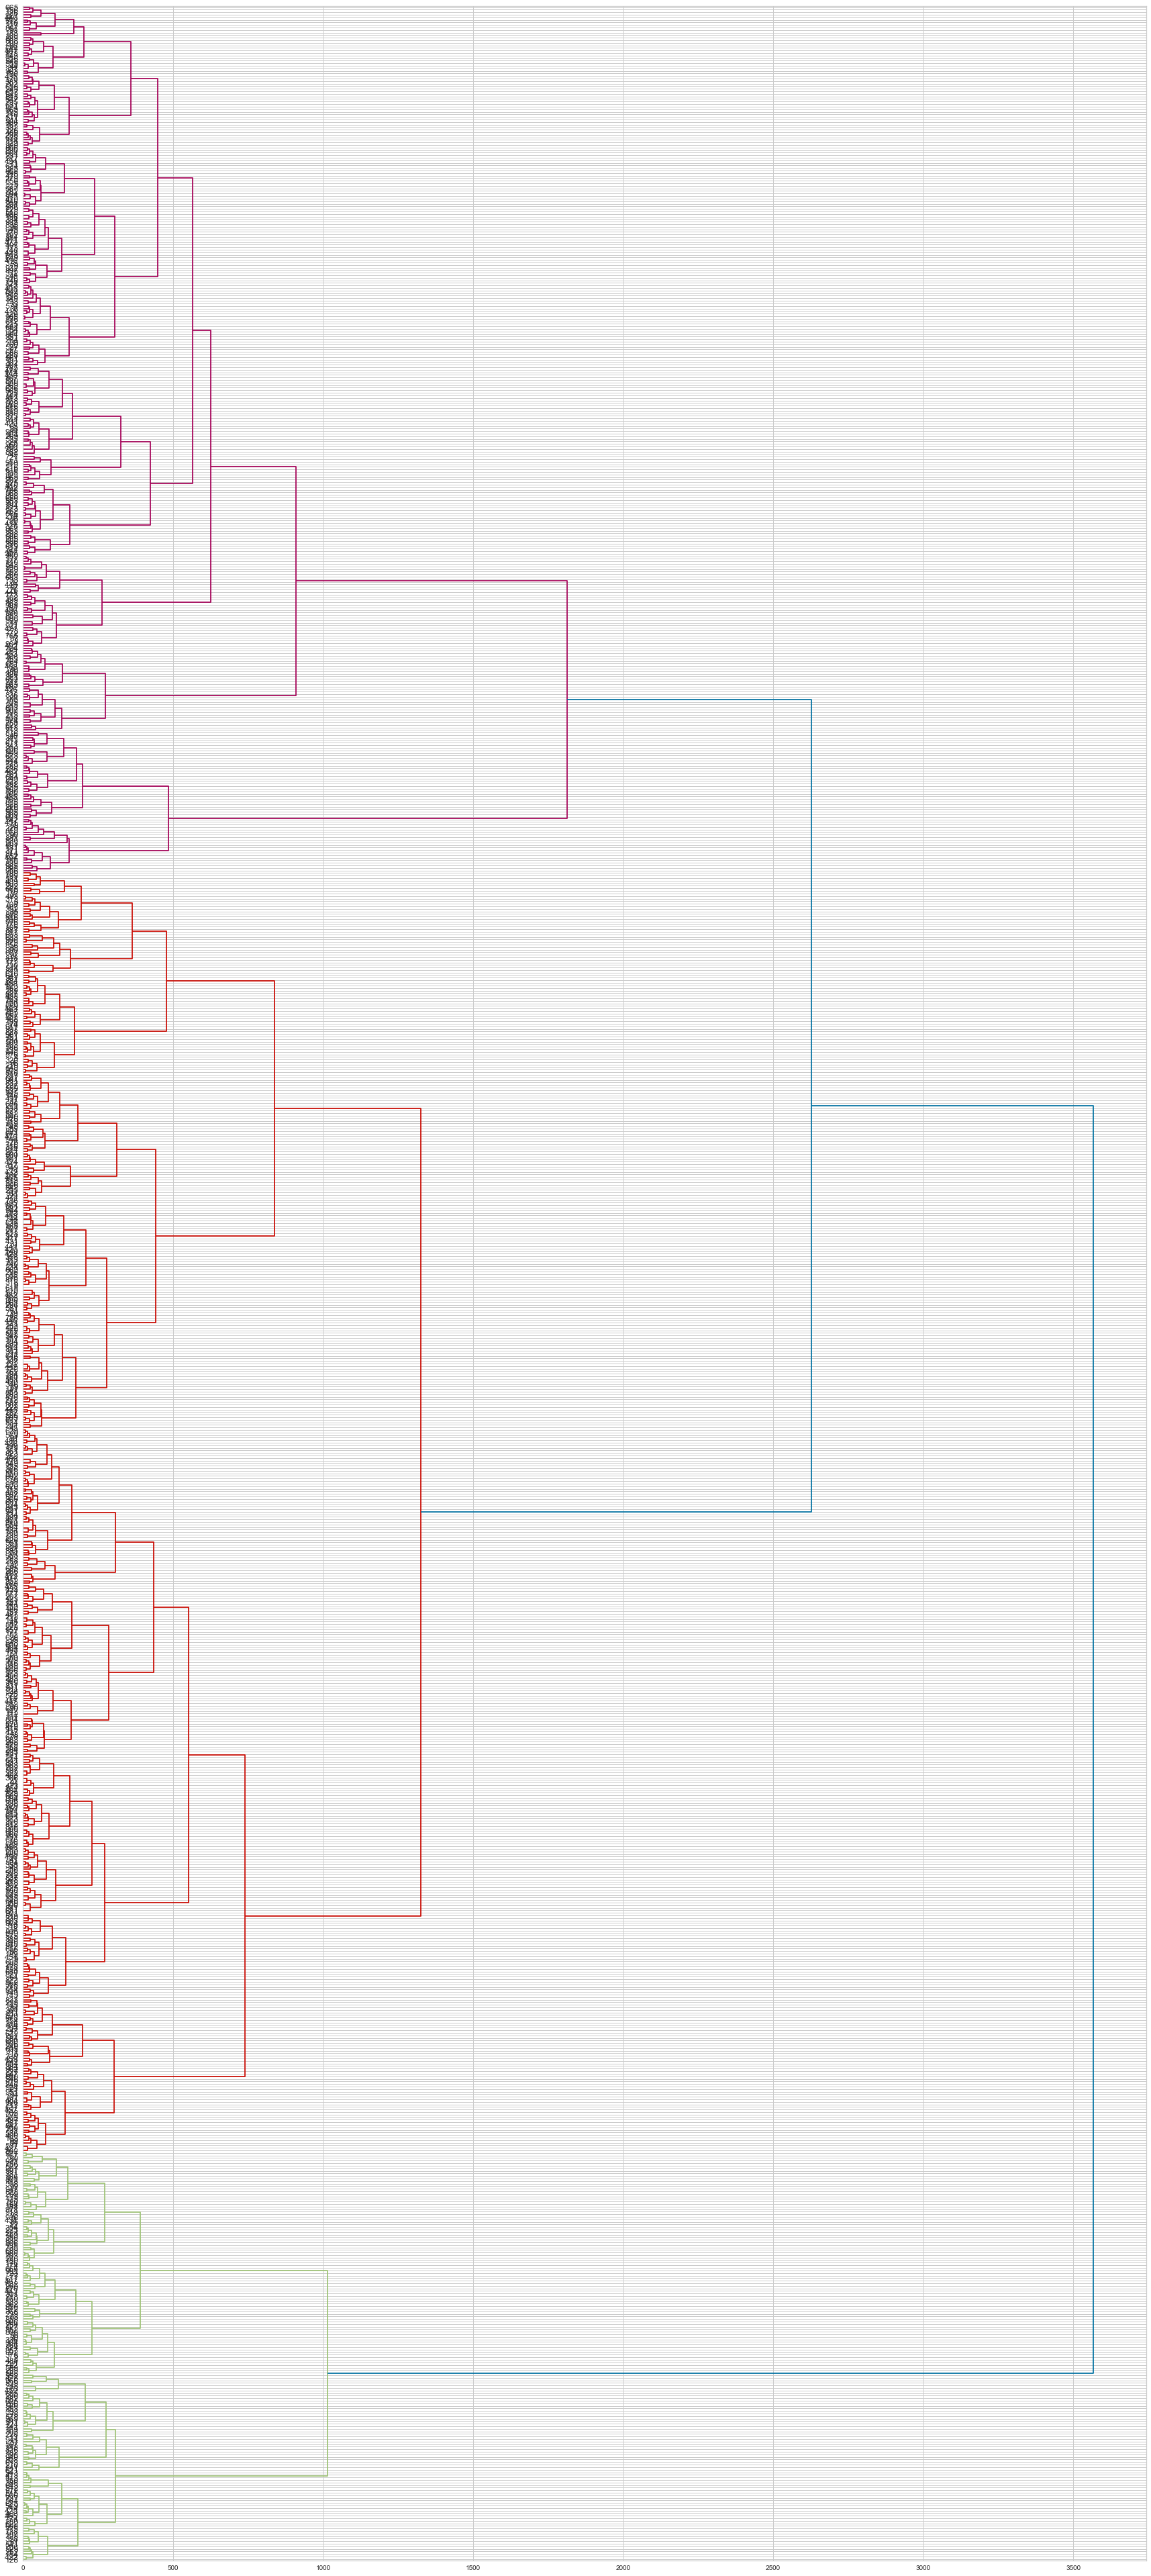

In [39]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X[['IAT', 'self', 'HPC', 'perf']], X[['IAT', 'self', 'HPC', 'perf']])
Z = hierarchy.linkage(dist, 'ward')

plt.figure(figsize=(30, 70))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

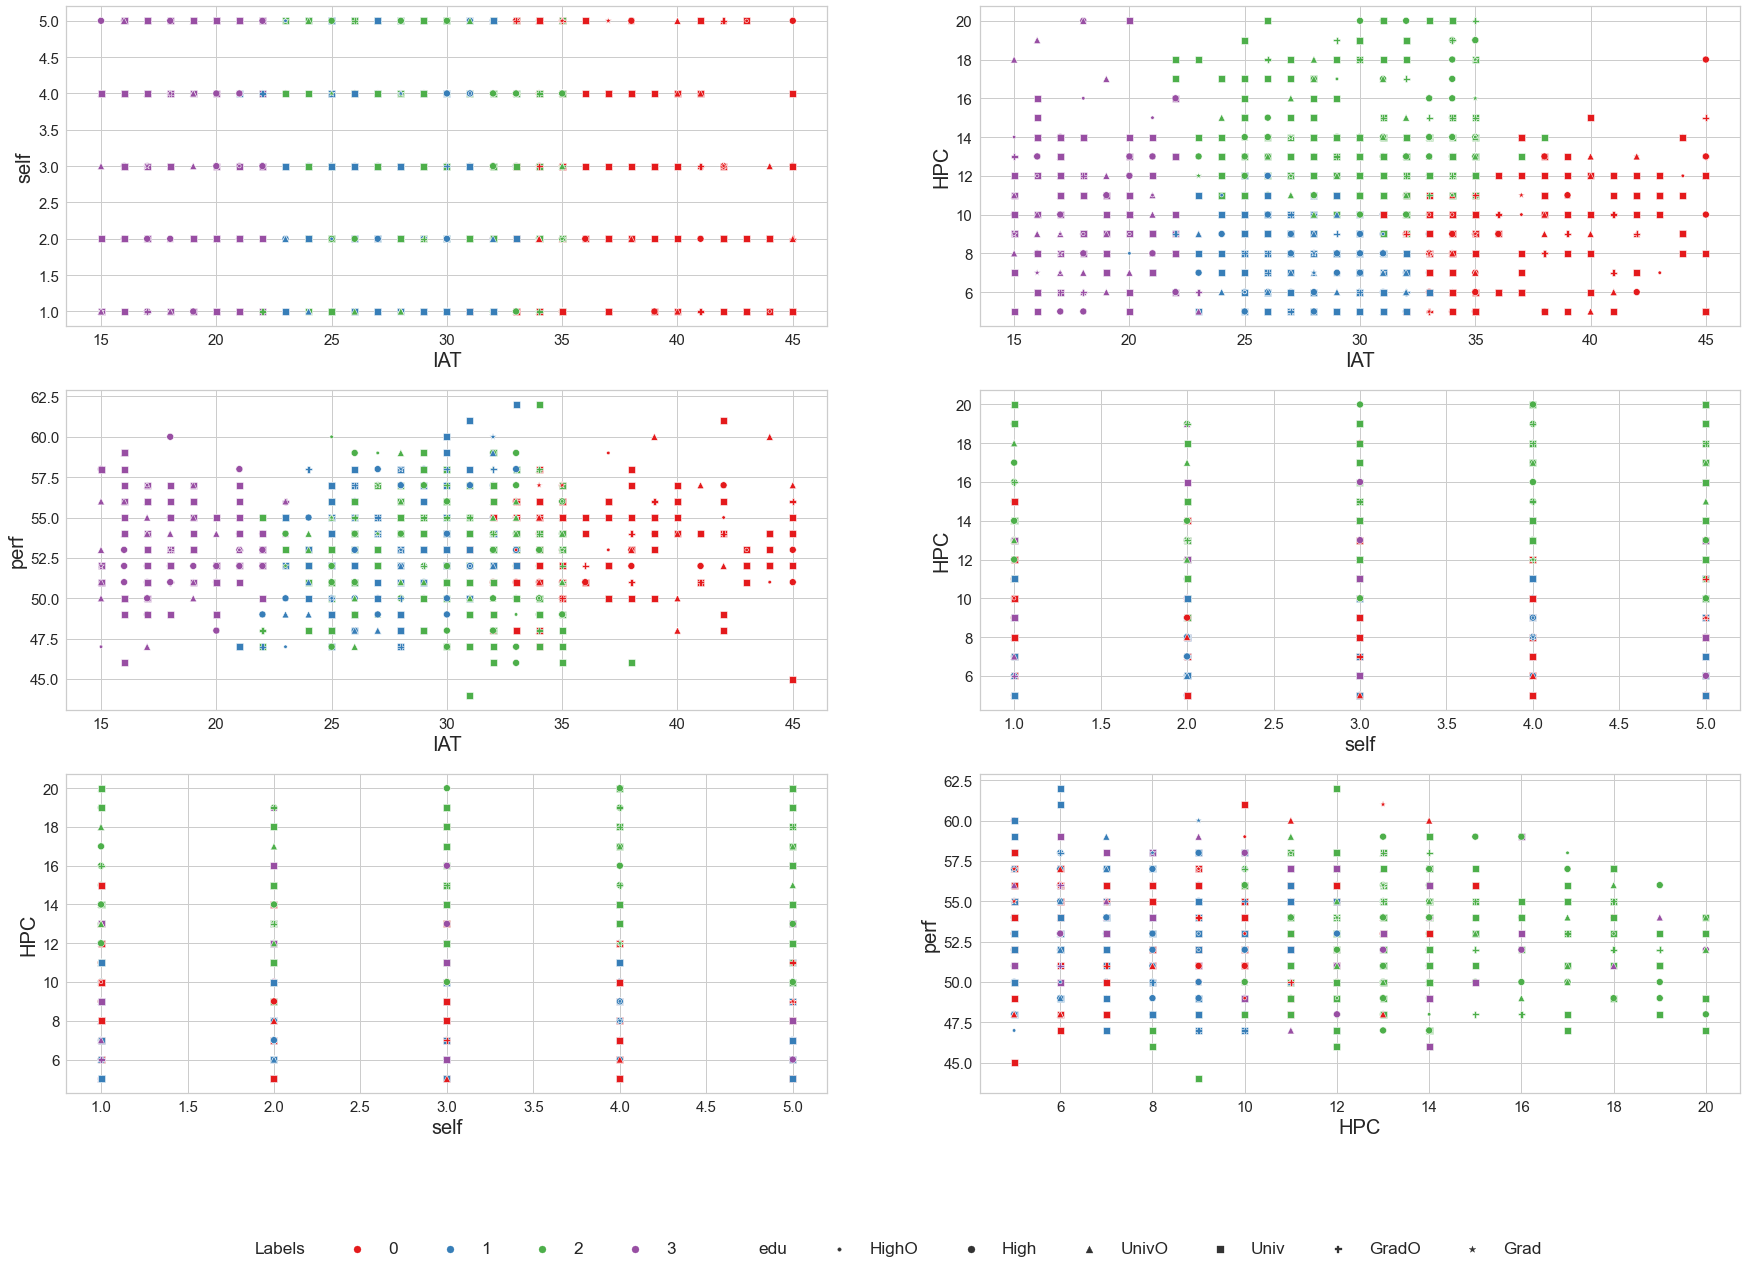

In [40]:
from sklearn.cluster import AgglomerativeClustering
n_cls = 4
# It can be seen that around line 2000, it is divided to 4 Clusters
agg_model = AgglomerativeClustering(n_clusters = n_cls, linkage = 'ward')

# assign each data point to a cluster
nums_ext['Labels'] = agg_model.fit_predict(X[['IAT', 'self', 'HPC', 'perf']])
n_cls = len(set(nums_ext['Labels']))

plotscat(nums_ext, n_cls, X)

edu     HighO  High  UnivO  Univ  GradO  Grad
Labels                                       
0          11    28     24   100     21    11
1          13    56     46   140     30    16
2          18    69     48   160     36    23
3          10    25     31    71      8     5
   Labels        age        IAT      self        HPC       perf     major  \
0       0  28.866667  36.769231  2.933333   8.943590  53.461538  0.071795   
1       1  28.352159  27.860465  2.980066   7.903654  53.073090  0.102990   
2       2  28.440678  30.347458  2.983051  13.632768  52.867232  0.093220   
3       3  28.353333  18.340000  3.166667  10.553333  53.193333  0.073333   

       work     sex_e   major_e    work_e  edu1_Grad  edu1_GradO  edu1_High  \
0  0.666667  0.476923  0.071795  0.666667   0.056410    0.107692   0.143590   
1  0.684385  0.514950  0.102990  0.684385   0.053156    0.099668   0.186047   
2  0.709040  0.536723  0.093220  0.709040   0.064972    0.101695   0.194915   
3  0.786667  0.480000 

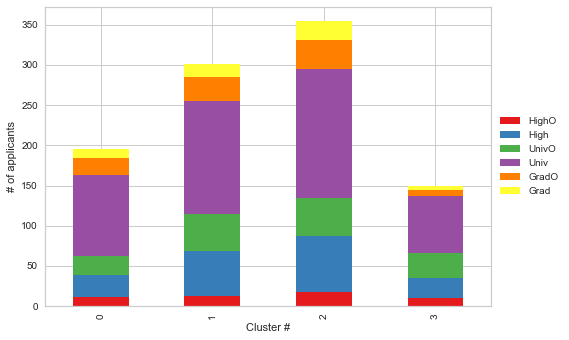

In [41]:
by_cl = nums_ext[['Labels','edu']].groupby(['Labels', 'edu'])['Labels'].count().unstack(fill_value=0)
by_cl = by_cl[edu_col_order]
print(by_cl)

ax = by_cl[by_cl.columns].plot(kind = "bar", color = cus_palette, stacked = True, legend = False)
plt.xlabel("Cluster #")
plt.ylabel("# of applicants")

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

print(nums_ext.groupby(['Labels'], as_index=False).mean())

<AxesSubplot:xlabel='Labels', ylabel='IAT'>

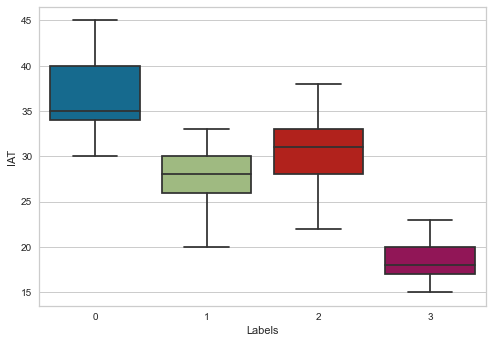

In [42]:
sns.boxplot(x='Labels', y='IAT', data=nums_ext)

HDBSCAN

/Users/jaichung/Documents/10_Work/codestates/.venv/lib/python3.9/site-packages/hdbscan/flat.py:155: UserWarning: Cannot predict more than 2 with cluster selection method 'eom'. Changing to method 'leaf'...
  warn(f"Cannot predict more than {max_eom_clusters} with cluster "


{0, 1, 2, -1}


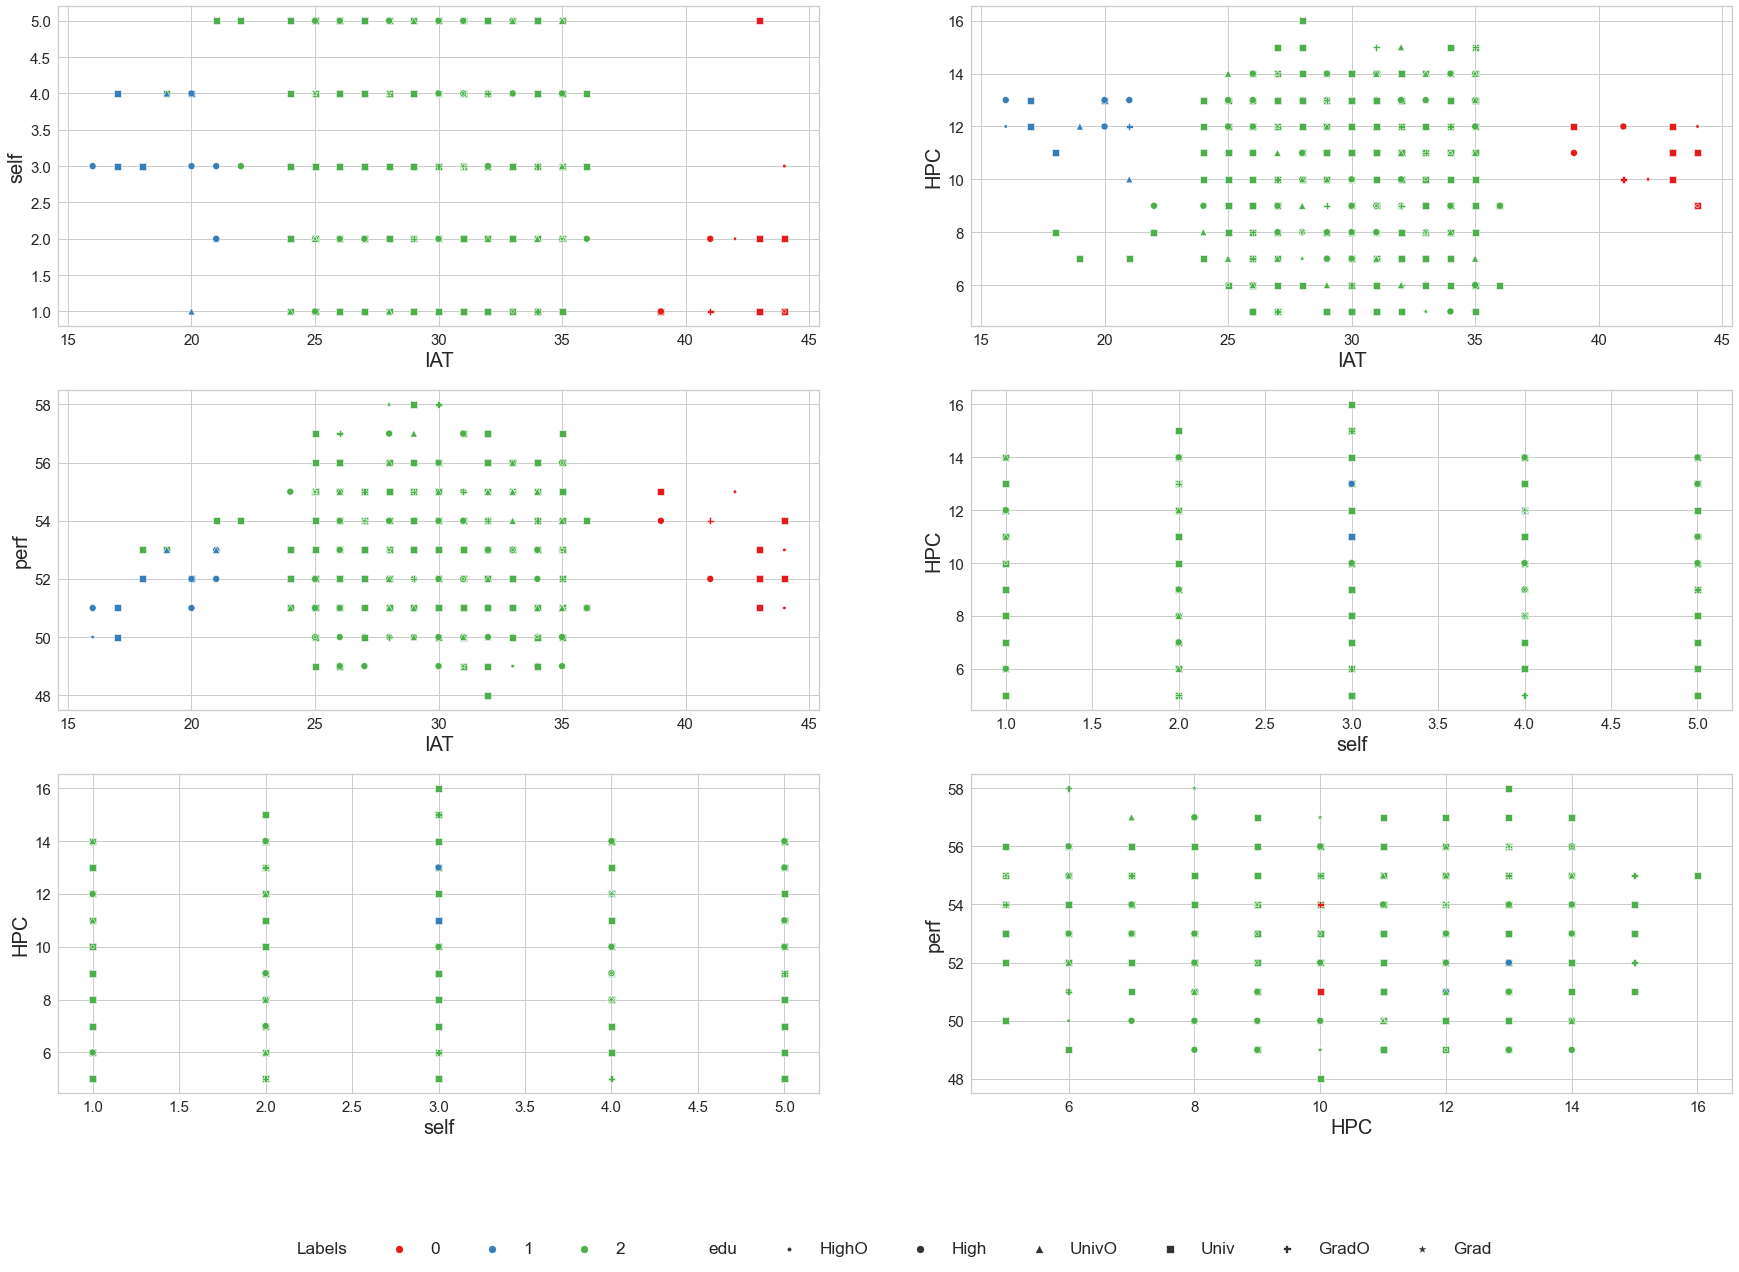

In [66]:
from hdbscan import flat

clusterer = flat.HDBSCAN(cluster_selection_method='eom', min_cluster_size=10).\
    fit(X[['IAT', 'self', 'HPC', 'perf']])

n_cls = 3

clusterer = flat.HDBSCAN_flat(X[['IAT', 'self', 'HPC', 'perf']], clusterer = clusterer,\
    n_clusters = n_cls)
nums_ext['Labels'] = clusterer.labels_
print(set(list(clusterer.labels_)))
nums_ext_hd = nums_ext[nums_ext['Labels']>=0]
plotscat(nums_ext_hd, n_cls, X)

edu     HighO  High  UnivO  Univ  GradO  Grad
Labels                                       
0           3     2      0     7      1     0
1           1     5      3     4      1     0
2          19    99     77   249     50    35
   Labels        age        IAT      self        HPC       perf    major  \
0       0  30.384615  42.307692  1.769231  10.769231  52.923077  0.00000   
1       1  32.000000  19.071429  2.928571  12.285714  51.785714  0.00000   
2       2  28.431002  29.984877  2.931947  10.034026  53.175803  0.10586   

       work     sex_e  major_e    work_e  edu1_Grad  edu1_GradO  edu1_High  \
0  0.692308  0.461538  0.00000  0.692308   0.000000    0.076923   0.153846   
1  1.000000  0.357143  0.00000  1.000000   0.000000    0.071429   0.357143   
2  0.693762  0.514178  0.10586  0.693762   0.066163    0.094518   0.187146   

   edu1_HighO  edu1_Univ  edu1_UnivO  
0    0.230769   0.538462    0.000000  
1    0.071429   0.285714    0.214286  
2    0.035917   0.470699    0.14555

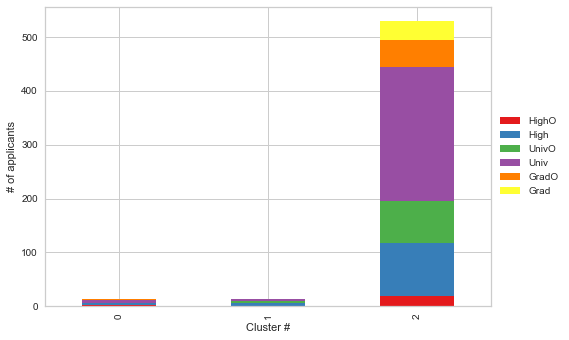

In [67]:
by_cl = nums_ext_hd[['Labels','edu']].groupby(['Labels', 'edu'])['Labels'].\
    count().unstack(fill_value=0)
by_cl = by_cl[edu_col_order]
print(by_cl)

ax = by_cl[by_cl.columns].plot(kind = "bar", color = cus_palette, \
    stacked = True, legend = False)
plt.xlabel("Cluster #")
plt.ylabel("# of applicants")

ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

print(nums_ext_hd.groupby(['Labels'], as_index=False).mean())

<AxesSubplot:xlabel='Labels', ylabel='IAT'>

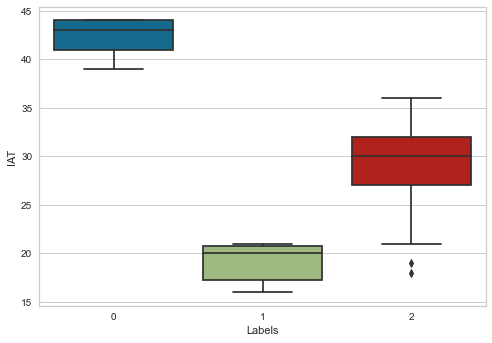

In [68]:
sns.boxplot(x='Labels', y='IAT', data=nums_ext_hd)